In [1]:
import pandas as pd

data = pd.read_csv('Kochi_NO2.txt')


In [2]:
import numpy as np

In [3]:
df = data.drop(columns= 'date')
df

,open_NO2,sate_NO2,"Vyttila, Kochi - Kerala PCB"
0,14.055000,3.226402e+15,56.96
1,4.784167,3.640530e+15,19.07
2,11.092083,2.864560e+15,0.25
3,10.245000,3.100670e+15,3.25
4,9.125000,2.730080e+15,13.63
...,...,...,...
398,9.761667,4.607660e+15,11.43
399,12.198333,3.112368e+15,12.01
400,12.597500,3.842800e+15,13.66
401,14.484583,2.647600e+15,17.09


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df

,open_NO2,sate_NO2,"Vyttila, Kochi - Kerala PCB"
0,0.491229,0.624585,1.000000
1,0.134464,0.694892,0.331864
2,0.377209,0.563155,0.000000
3,0.344611,0.603239,0.052901
4,0.301510,0.540324,0.235937
...,...,...,...
398,0.326011,0.859082,0.197143
399,0.419780,0.605225,0.207371
400,0.435141,0.729231,0.236466
401,0.507761,0.526321,0.296949


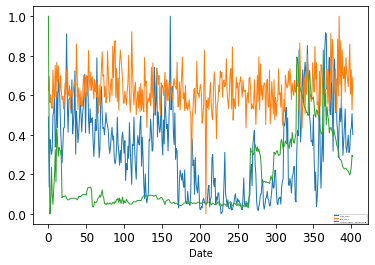

In [5]:
ax = df.plot(linewidth=1, fontsize=12);
ax.set_xlabel('Date');
ax.legend(fontsize=2);

In [6]:
df

,open_NO2,sate_NO2,"Vyttila, Kochi - Kerala PCB"
0,0.491229,0.624585,1.000000
1,0.134464,0.694892,0.331864
2,0.377209,0.563155,0.000000
3,0.344611,0.603239,0.052901
4,0.301510,0.540324,0.235937
...,...,...,...
398,0.326011,0.859082,0.197143
399,0.419780,0.605225,0.207371
400,0.435141,0.729231,0.236466
401,0.507761,0.526321,0.296949


In [7]:
y = df['open_NO2']
x = df.drop(columns =["open_NO2"])

In [8]:
df.describe()

,open_NO2,sate_NO2,"Vyttila, Kochi - Kerala PCB"
count,403.000000,403.000000,403.000000
mean,0.320569,0.630728,0.181978
std,0.216307,0.099917,0.180421
min,0.000000,0.000000,0.000000
25%,0.111255,0.568074,0.055193
50%,0.325033,0.623759,0.084112
75%,0.462576,0.685227,0.303297
max,1.000000,1.000000,1.000000


# Normal OLS

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LinearRegression().fit(x,y)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

0.1756498501041377

In [10]:
scores = cross_val_score(model, x, y, scoring='r2',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

0.08275363174692472

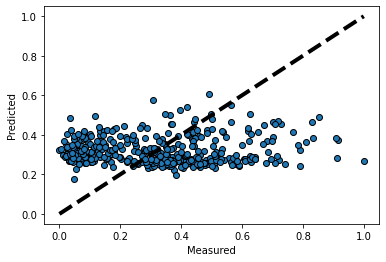

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict


predicted = cross_val_predict(model, x, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# LASSO

In [12]:
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")
model = linear_model.Lasso(alpha=0.1)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

0.18113568782405892

In [13]:
scores = cross_val_score(model, x, y, scoring='r2',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

0.02504264270157146

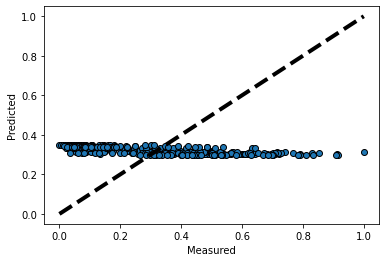

In [14]:


predicted = cross_val_predict(model, x, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# Ridge

In [15]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

0.17565086715795156

In [16]:
scores = cross_val_score(model, x, y, scoring='r2',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

0.08201135669123813

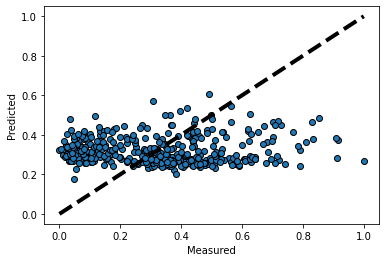

In [17]:

predicted = cross_val_predict(model, x, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# Elastic Net

In [18]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(random_state=0)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

0.18113568782405892

In [19]:
scores = cross_val_score(model, x, y, scoring='r2',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

0.02504264270157146

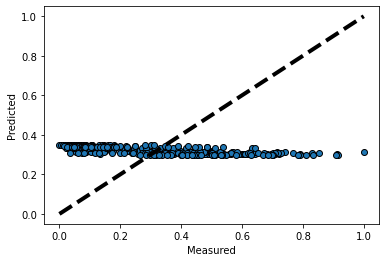

In [20]:

predicted = cross_val_predict(model, x, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# Decision tree

In [21]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

0.20017531994364743

In [22]:
scores = cross_val_score(model, x, y, scoring='r2',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

0.5092306171535537

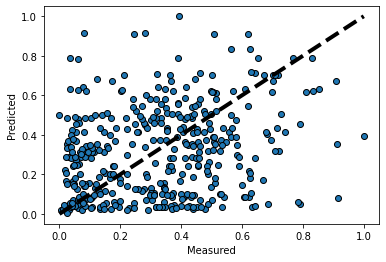

In [23]:

predicted = cross_val_predict(model, x, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [24]:
regr = tree.DecisionTreeRegressor()
model = regr.fit(x, y)
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_1 <= 0.06
|   |--- feature_1 <= 0.05
|   |   |--- feature_0 <= 0.69
|   |   |   |--- feature_1 <= 0.04
|   |   |   |   |--- feature_0 <= 0.56
|   |   |   |   |   |--- value: [0.04]
|   |   |   |   |--- feature_0 >  0.56
|   |   |   |   |   |--- feature_1 <= 0.02
|   |   |   |   |   |   |--- value: [0.38]
|   |   |   |   |   |--- feature_1 >  0.02
|   |   |   |   |   |   |--- value: [0.37]
|   |   |   |--- feature_1 >  0.04
|   |   |   |   |--- feature_1 <= 0.04
|   |   |   |   |   |--- feature_1 <= 0.04
|   |   |   |   |   |   |--- feature_0 <= 0.65
|   |   |   |   |   |   |   |--- feature_0 <= 0.53
|   |   |   |   |   |   |   |   |--- value: [0.06]
|   |   |   |   |   |   |   |--- feature_0 >  0.53
|   |   |   |   |   |   |   |   |--- feature_0 <= 0.62
|   |   |   |   |   |   |   |   |   |--- value: [0.04]
|   |   |   |   |   |   |   |   |--- feature_0 >  0.62
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.04
|   |   |   |   |   |   |   |   |   |   |--- value: [0

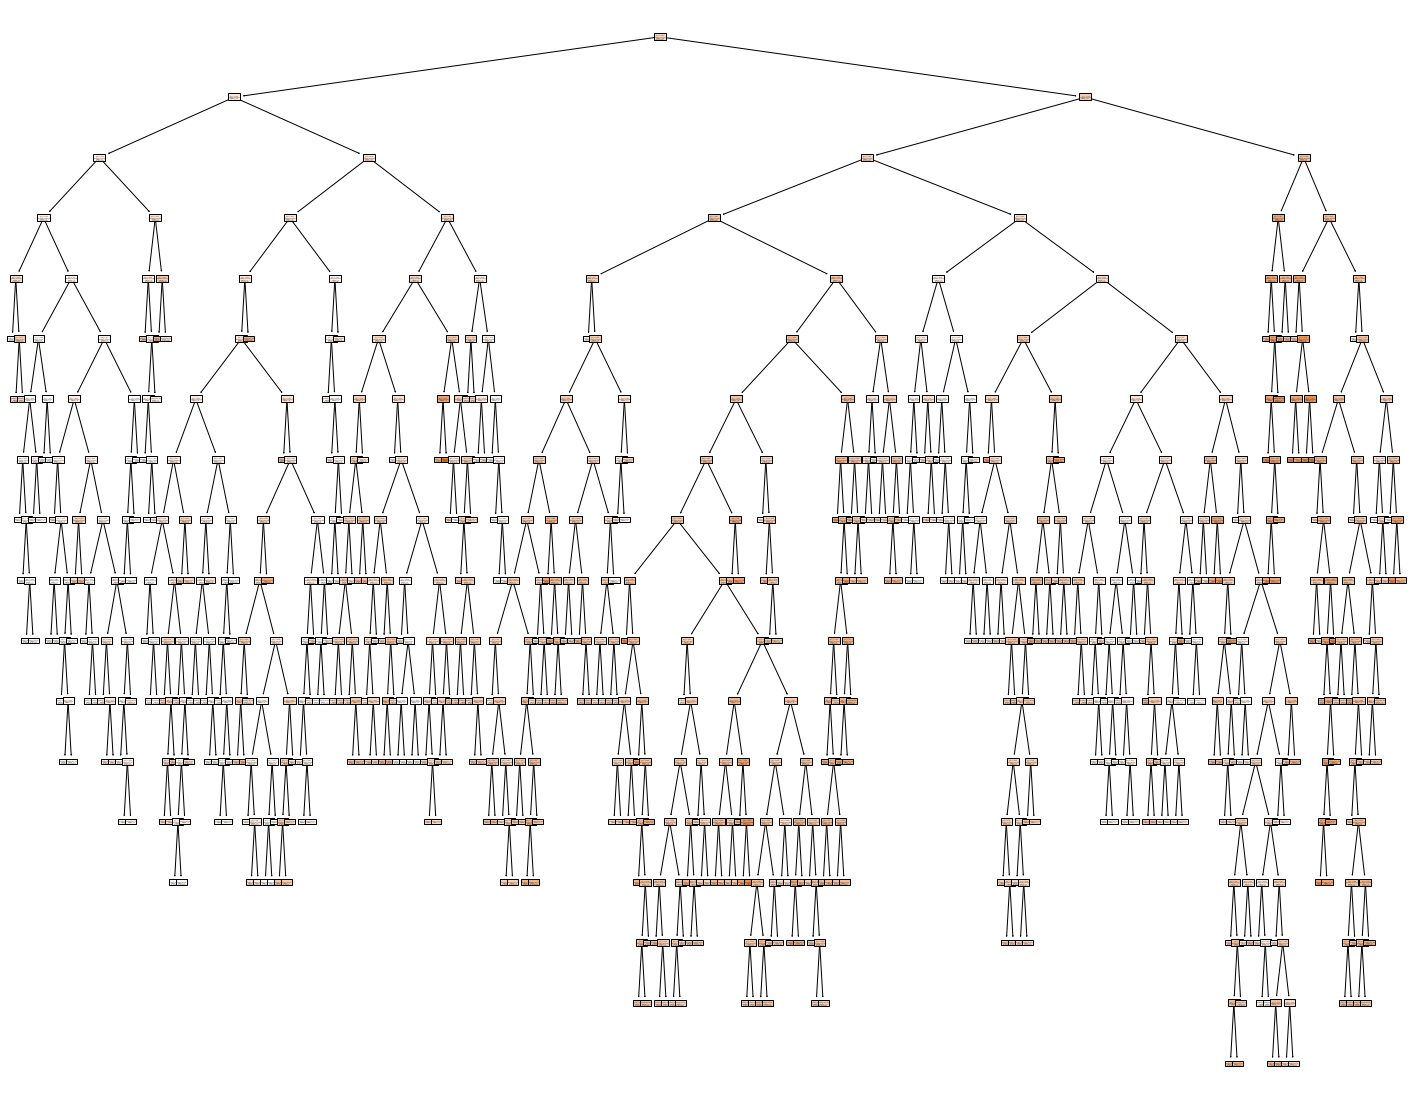

In [25]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, filled=True)

In [26]:
import xgboost
model = xgboost.XGBRegressor()
fit_params={'early_stopping_rounds': 30, 
            'eval_metric': 'mae',
            'verbose': False,
            'eval_set': [[x, y]]}
scores = cross_val_score(model, x, y, 
                         cv = cv, 
                         scoring = 'neg_mean_absolute_error',
                         fit_params = fit_params)

np.mean(np.absolute(scores))

0.17502739606894233

In [27]:
scores = cross_val_score(model, x, y, 
                         cv = cv, 
                         scoring = 'r2',
                         fit_params = fit_params)

np.mean(np.absolute(scores))

0.23546876059513827